In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [7]:
cities

['bredasdorp',
 'illoqqortoormiut',
 'dikson',
 'rikitea',
 'vaini',
 'punta arenas',
 'tasiilaq',
 'veraval',
 'kruisfontein',
 'port hardy',
 'mataura',
 'cape town',
 'saint-philippe',
 'butaritari',
 'busselton',
 'at-bashi',
 'cidreira',
 'coihaique',
 'castro',
 'atuona',
 'zhenlai',
 'bethel',
 'yulara',
 'caravelas',
 'los llanos de aridane',
 'valley city',
 'pevek',
 'samusu',
 'kazalinsk',
 'ushuaia',
 'wladyslawowo',
 'hermanus',
 'chapais',
 'taywarah',
 'taolanaro',
 'san quintin',
 'carnarvon',
 'kapaa',
 'grenfell',
 'quibor',
 'ouesso',
 'waingapu',
 'porto velho',
 'sisimiut',
 'mount gambier',
 'juneau',
 'upernavik',
 'hobart',
 'raposa',
 'tiksi',
 'walvis bay',
 'saint-augustin',
 'lebu',
 'amderma',
 'high rock',
 'rocha',
 'puerto ayora',
 'georgetown',
 'albany',
 'leningradskiy',
 'port blair',
 'souillac',
 'mahanoro',
 'rawson',
 'lompoc',
 'attawapiskat',
 'new norfolk',
 'louisbourg',
 'hilo',
 'santa isabel',
 'ponta do sol',
 'katsuura',
 'bandarbeyla',


In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lisst to hold information
temperatures = []
longitudes = []
latitudes = []
clouds = []
wind_speeds = []
countries = []
humidities = []
dates = []
cities_found = []

print("Beginning Data Retrieval")
print("-----------------------------")
cont=1

for city in cities:
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    # Get weather data
    weather_response = requests.get(query_url)
    
    if weather_response.status_code == 200:
        print(f"Processing Record {cont} | {city}")
        weather_json = weather_response.json()
        
        # Get temperature from JSON response
        cities_found.append(city)
        temperature = weather_json["main"]["temp_max"]
        temperatures.append(temperature)
        longitude = weather_json["coord"]["lon"]
        longitudes.append(longitude)
        latitude = weather_json["coord"]["lat"]
        latitudes.append(latitude)
        cloud = weather_json["clouds"]["all"]
        clouds.append(cloud)
        wind_speed = weather_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        country = weather_json["sys"]["country"]
        countries.append(country)
        humidity = weather_json["main"]["humidity"]
        humidities.append(humidity)
        date = weather_json["dt"]
        dates.append(date)
        
        cont=cont+1
    elif weather_response.status_code == 404:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bredasdorp
City not found. Skipping...
Processing Record 2 | dikson
Processing Record 3 | rikitea
Processing Record 4 | vaini
Processing Record 5 | punta arenas
Processing Record 6 | tasiilaq
Processing Record 7 | veraval
Processing Record 8 | kruisfontein
Processing Record 9 | port hardy
Processing Record 10 | mataura
Processing Record 11 | cape town
Processing Record 12 | saint-philippe
Processing Record 13 | butaritari
Processing Record 14 | busselton
Processing Record 15 | at-bashi
Processing Record 16 | cidreira
Processing Record 17 | coihaique
Processing Record 18 | castro
Processing Record 19 | atuona
Processing Record 20 | zhenlai
Processing Record 21 | bethel
Processing Record 22 | yulara
Processing Record 23 | caravelas
Processing Record 24 | los llanos de aridane
Processing Record 25 | valley city
Processing Record 26 | pevek
City not found. Skipping...
City not found. Skipping...
Processing Record 

Processing Record 227 | miri
City not found. Skipping...
Processing Record 228 | longyearbyen
City not found. Skipping...
Processing Record 229 | kencong
Processing Record 230 | rundu
Processing Record 231 | sosnovo-ozerskoye
Processing Record 232 | nassau
Processing Record 233 | kulhudhuffushi
Processing Record 234 | paragould
City not found. Skipping...
Processing Record 235 | san luis
Processing Record 236 | acari
Processing Record 237 | umm lajj
Processing Record 238 | sept-iles
Processing Record 239 | monticello
City not found. Skipping...
Processing Record 240 | arraial do cabo
Processing Record 241 | bandarawela
Processing Record 242 | beyneu
Processing Record 243 | saldanha
Processing Record 244 | port alfred
Processing Record 245 | kalmunai
Processing Record 246 | henties bay
City not found. Skipping...
Processing Record 247 | honiara
Processing Record 248 | nikolskoye
Processing Record 249 | barrow
City not found. Skipping...
Processing Record 250 | negombo
Processing Record 

Processing Record 446 | hof
Processing Record 447 | verkhnyaya inta
Processing Record 448 | kargasok
Processing Record 449 | deputatskiy
Processing Record 450 | boa vista
Processing Record 451 | canton
Processing Record 452 | arzgir
Processing Record 453 | chimbote
Processing Record 454 | roswell
Processing Record 455 | alugan
Processing Record 456 | mae ramat
Processing Record 457 | rognan
Processing Record 458 | karratha
Processing Record 459 | panjakent
Processing Record 460 | sarh
Processing Record 461 | kundiawa
Processing Record 462 | centerville
Processing Record 463 | north bend
Processing Record 464 | kisumu
Processing Record 465 | vostok
City not found. Skipping...
Processing Record 466 | malatya
Processing Record 467 | chimbarongo
Processing Record 468 | babol
Processing Record 469 | baneh
Processing Record 470 | ozernovskiy
City not found. Skipping...
Processing Record 471 | aykhal
Processing Record 472 | bilma
Processing Record 473 | haljala
Processing Record 474 | kuytun


In [10]:
# zip the lists, creating DataFrame and export to CSV
list_of_tuples = list(zip(cities_found,clouds,countries,dates,humidities,latitudes,longitudes,temperatures,wind_speeds))
df_cities = pd.DataFrame(list_of_tuples, columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
df_cities.to_csv(output_data_file)
df_cities.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [12]:
df_cities.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,50,ZA,1563603399,81,-34.53,20.04,46.40,4.70
1,dikson,93,RU,1563603400,81,73.51,80.55,41.99,17.87
2,rikitea,71,PF,1563603122,58,-23.12,-134.97,67.01,11.97
3,vaini,75,IN,1563603401,78,15.34,74.49,82.40,6.93
4,punta arenas,0,CL,1563603401,86,-53.16,-70.91,33.80,13.87
5,tasiilaq,95,GL,1563603401,93,65.61,-37.64,41.00,8.05
6,veraval,75,FR,1563603402,82,49.65,0.71,66.99,10.29
7,kruisfontein,91,ZA,1563603402,78,-34.00,24.73,46.67,17.13
8,port hardy,20,CA,1563603402,87,50.70,-127.42,57.20,5.82
9,mataura,100,NZ,1563603403,98,-46.19,168.86,48.00,5.01


In [13]:
# Store the date
readable = time.ctime(1563597418)
date_format=datetime.strptime(readable, "%a %b %d %H:%M:%S %Y")
date_format=str(date_format).split(' ')[0]
date_format=date_format.split('-')
date_format=date_format[1] + '/' + date_format[2] + '/' + date_format[0]
date_format

'07/19/2019'

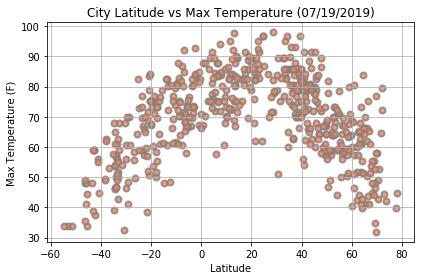

In [14]:
# Scatter plot Latitude vs Temperature
lat_temp =  plt.scatter(df_cities["Lat"], df_cities["Max Temp"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Max Temp')
title="City Latitude vs Max Temperature" + " (" + str(date_format) + ")"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.savefig("latitude_vs_temperature.png",bbox_inches="tight")
plt.show()

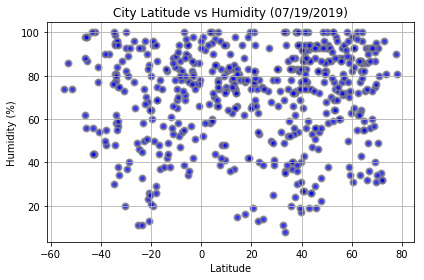

In [15]:
# Scatter plot Latitude vs Humidity
lat_hum =  plt.scatter(df_cities["Lat"], df_cities["Humidity"], c="blue",alpha=0.8, edgecolors="gray", linewidth=2, label='Max Temp')
title="City Latitude vs Humidity" + " (" + str(date_format) + ")"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.savefig("latitude_vs_humidity.png",bbox_inches="tight")
plt.show()

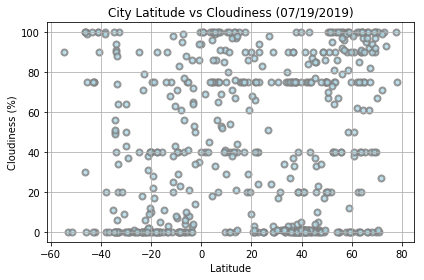

In [16]:
# Scatter plot Latitude vs Cloudiness
lat_cloud =  plt.scatter(df_cities["Lat"], df_cities["Cloudiness"], c="lightblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Max Temp')
title="City Latitude vs Cloudiness" + " (" + str(date_format) + ")"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.savefig("latitude_vs_cloudiness.png",bbox_inches="tight")
plt.show()

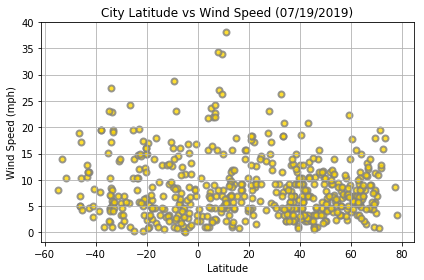

In [17]:
# Scatter plot Latitude vs Wind Speed
lat_wind =  plt.scatter(df_cities["Lat"], df_cities["Wind Speed"], c="gold",alpha=0.8, edgecolors="gray", linewidth=2, label='Max Temp')
title="City Latitude vs Wind Speed" + " (" + str(date_format) + ")"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.savefig("latitude_vs_windspeed.png",bbox_inches="tight")
plt.show()

In [ ]:
# Observable trends:
# - Lower temperature is observed when the latitude is closer to North or South Pole (latitude negative values)
# - It looks like cloudiness keeps lower values when latitude is between -40 to -20.
# - It looks like Humidity and latitude independent among themselves